## Project 1: Market Data Analysis
Objective: Analyze the risk and return profiles of a tech stock (TSLA) versus the S&P 500 benchmark (SPY)
  
Metrics Calculated:
- Annualized Volatility (Risk)
- Maximum Drawdown
- Sharpe Ratio

## Theory!

### Returns 
Calculate the daily expected return: 

$$ 
R_{t} = \frac{P_{t}-P_{t-1}}{P_{t-1}} 
$$  

Where:
- $R_{t}$ is the percent daily return
- $P_{t}$ is the current price
- $P_{t-1}$ is the reference price

To get annualized return, we scale the average daily return by the number of trading days in a year:
$$
R_{t_{annualized}} = 252R_{avg}
$$

### Volatility Modeling
Volatility is the standard deviation of returns. Since variance sums for independent events, the standard deviation scales with the square root of time!

*Daily standard deviation:*
$$
\sigma = \sqrt{\frac{\sum{(R_{t}-R_{avg})^2}}{n}}
$$

*Annualized Volatility:*
$$
\sigma_{annual} = \sqrt{252}\sigma
$$

### Sharpe Ratio
The sharpe ratio measures the ratio between excess return and volatility (return over risk). We use a benchmark for "risk free return" (like t-bills or something) to be sure to compare excess return with risk taken.

$$
SR = \frac{R_{p}-R_{f}}{\sigma_{p}}
$$
Where:
- $ R_{p} $ is the annualized total return
- $ R_{f} $ is the risk free return
- $ \sigma_{p} $ is the annualized volatility

### Maximum Drawdown
Drawdown is the percent decline from historical peak to the current value. It represents your return if you "bought the top."

$$
MDD = 100\times(\frac{Current Price}{Rolling Maximum Price}-1)

In [34]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Setup
tickers = ['TSLA', 'SPY']
risk_free_rate = 0.04
df = yf.download(tickers, start = "2020-01-01", end = "2025-01-01")["Close"]

C:\Users\brand\AppData\Local\Temp\ipykernel_14584\3711425352.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start = "2020-01-01", end = "2025-01-01")["Close"]
[*********************100%***********************]  2 of 2 completed


In [67]:
#Calculate returns
# R_t = (P_t - P_t-1) / P_t-1 (pctchange)
daily_returns = df.pct_change().dropna()
avg_daily_returns = daily_returns.mean()

#annualized returns
annual_returns = 252*avg_daily_returns

#annualized volatility (sqrt(252)stdv)
annual_volatility = np.sqrt(252)*daily_returns.std()
annual_percent_volatility = 100*annual_volatility
#sharpe ratio
sharpe_ratio = (annual_returns - risk_free_rate)/annual_volatility

#max drawdown 
rolling_max = df.cummax()
daily_drawdown = ((df/rolling_max) - 1)
max_drawdown = daily_drawdown.min()
max_percent_drawdown = 100*max_drawdown
#print
print("Annualized percent volatility:\n{}\n".format(annual_percent_volatility.to_string()))
print("Sharpe Ratio:\n{}\n".format(sharpe_ratio.to_string()))
print("Max Percent Drawdown:\n{}\n".format(max_percent_drawdown.to_string()))

Annualized percent volatility:
Ticker
SPY     20.997292
TSLA    67.181528

Sharpe Ratio:
Ticker
SPY     0.550731
TSLA    1.064798

Max Percent Drawdown:
Ticker
SPY    -33.717262
TSLA   -73.632217



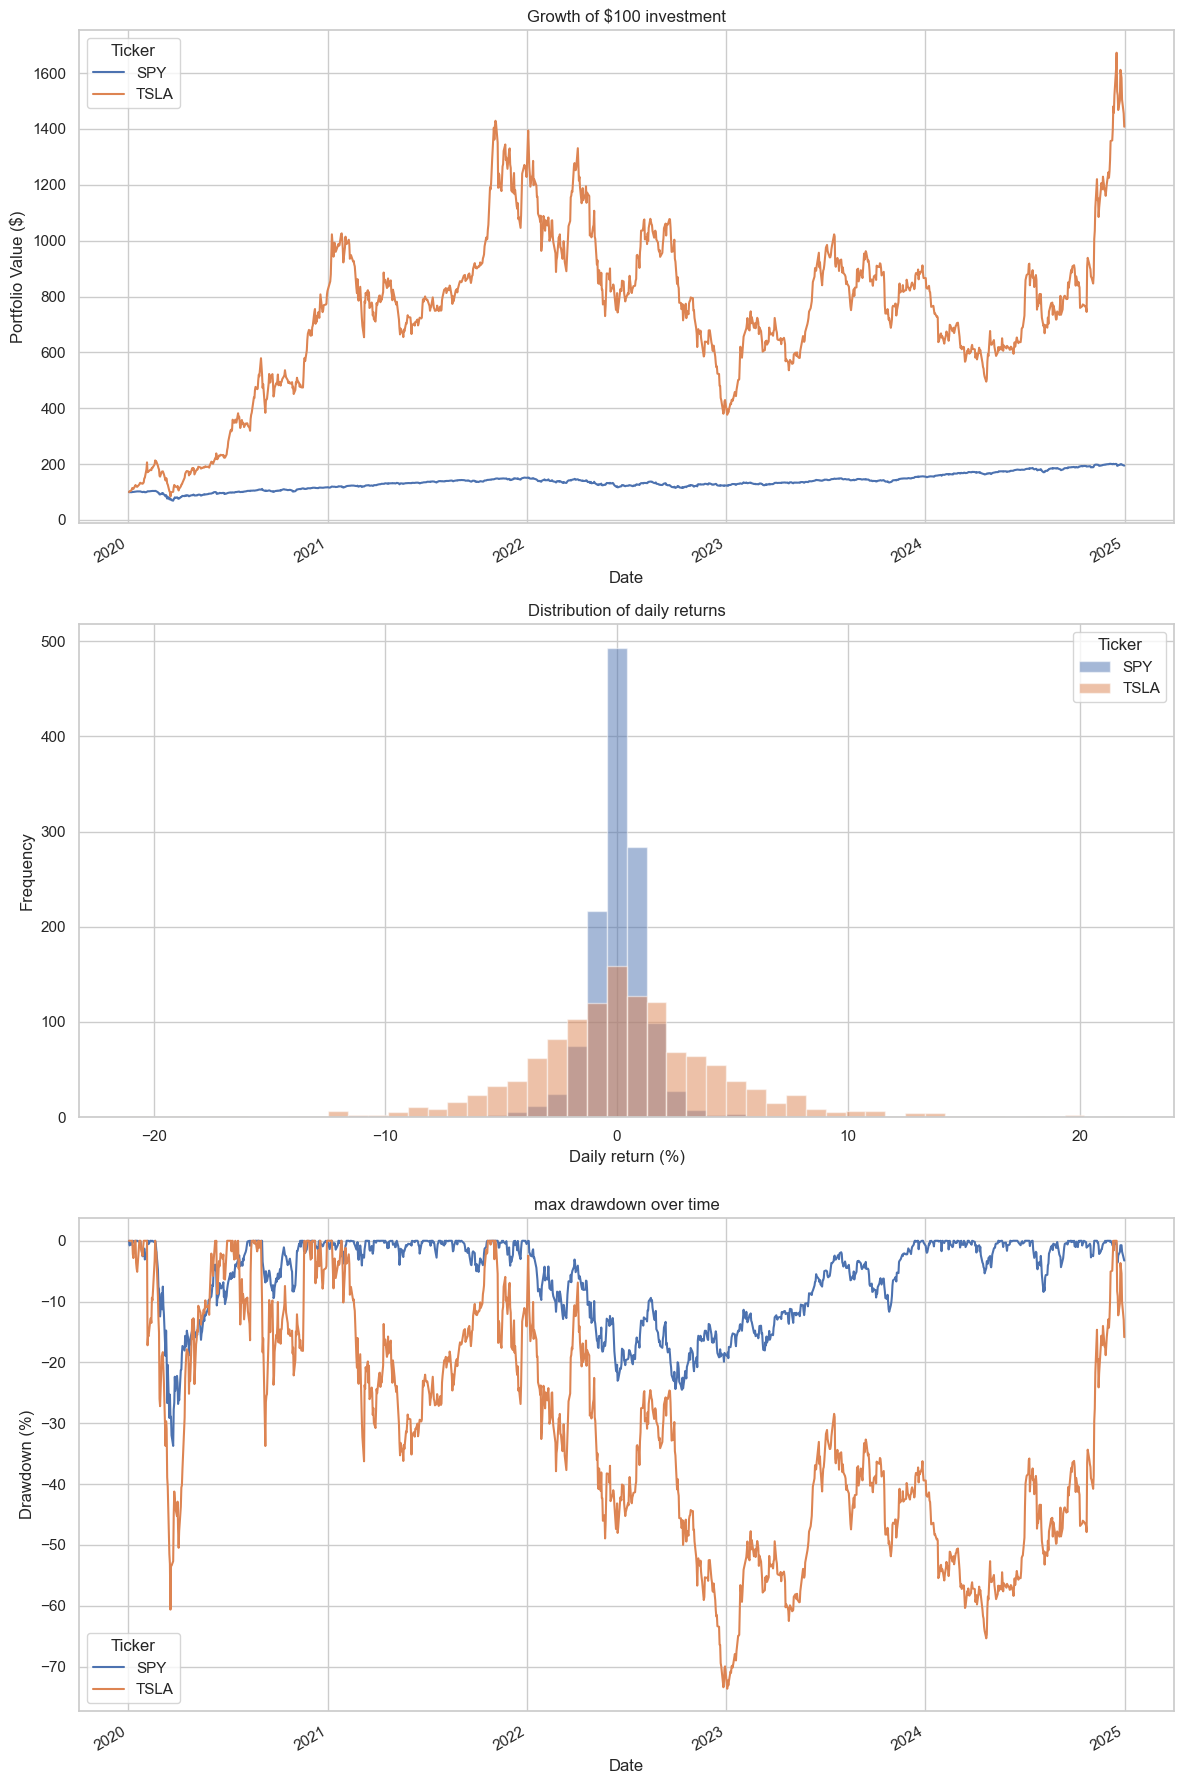

In [62]:
# 4. VISUALIZATION

# Setup the figure layout (3 rows)
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

#normalized price for 100 dollar investment
normalized_price = (df / df.iloc[0]) * 100
normalized_price.plot(ax = axes[0])
axes[0].set_title("Growth of $100 investment")
axes[0].set_ylabel("Portfolio Value ($)")

#histogram of returns (bell)
daily_percent_returns = daily_returns*100
daily_percent_returns.plot.hist(bins = 50, alpha = 0.5, ax = axes[1])
axes[1].set_title("Distribution of daily returns")
axes[1].set_xlabel("Daily return (%)")

#drawdown
daily_percent_drawdown = 100*daily_drawdown
daily_percent_drawdown.plot(ax=axes[2])
axes[2].set_title("max drawdown over time")
axes[2].set_ylabel("Drawdown (%)")

plt.tight_layout()
plt.show()
